In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.datasets import fetch_openml 
from openTSNE import TSNE 
from sklearn.manifold import TSNE as TSNE_SK

sns.set()

In [10]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF']

In [3]:
mnist = fetch_openml('mnist_784')

X, y = mnist['data'], mnist['target']

X = X.to_numpy().astype('float32')
y = y.to_numpy().astype('int')

print("Shape of features (X):", X.shape)
print("Shape of labels (y):", y.shape)

Shape of features (X): (70000, 784)
Shape of labels (y): (70000,)


In [4]:
tsne = TSNE(
    perplexity=25, 
    metric="euclidean",
    n_jobs=8,
    random_state=42,
    verbose=True,
    )

In [5]:
embeddings =tsne.fit(X)

--------------------------------------------------------------------------------
TSNE(early_exaggeration=12, n_jobs=8, perplexity=25, random_state=42,
     verbose=True)
--------------------------------------------------------------------------------
===> Finding 75 nearest neighbors using Annoy approximate search using euclidean distance...
   --> Time elapsed: 63.44 seconds
===> Calculating affinity matrix...
   --> Time elapsed: 4.01 seconds
===> Calculating PCA-based initialization...
   --> Time elapsed: 2.37 seconds
===> Running optimization with exaggeration=12.00, lr=5833.33 for 250 iterations...
Iteration   50, KL divergence 6.1257, 50 iterations in 11.2253 sec
Iteration  100, KL divergence 5.9316, 50 iterations in 11.2731 sec
Iteration  150, KL divergence 5.8698, 50 iterations in 10.5748 sec
Iteration  200, KL divergence 5.8487, 50 iterations in 10.8664 sec
Iteration  250, KL divergence 5.8396, 50 iterations in 11.0138 sec
   --> Time elapsed: 54.96 seconds
===> Running optim

In [6]:
embeddings.shape

(70000, 2)

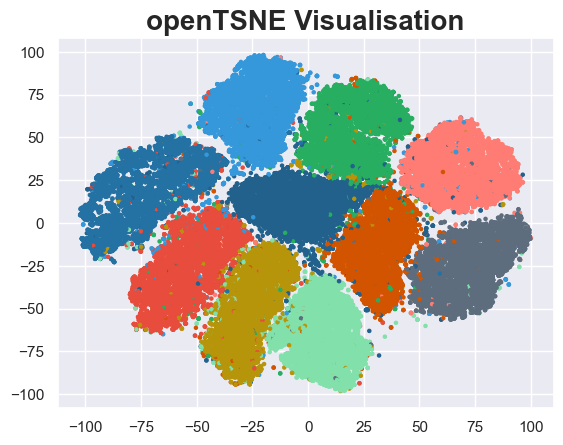

In [11]:
fig, ax = plt.subplots()

ax.scatter(embeddings[:, 0], embeddings[:, 1], c = [colors[i] for i in y], s=5)
ax.set_title("openTSNE Visualisation", fontsize=20, weight="bold")

plt.show()

In [13]:
embeddings_sklearn = TSNE_SK(n_components=2,
                             learning_rate=20,
                             perplexity=25,
                             random_state=42,
                             n_jobs=8).fit_transform(X)

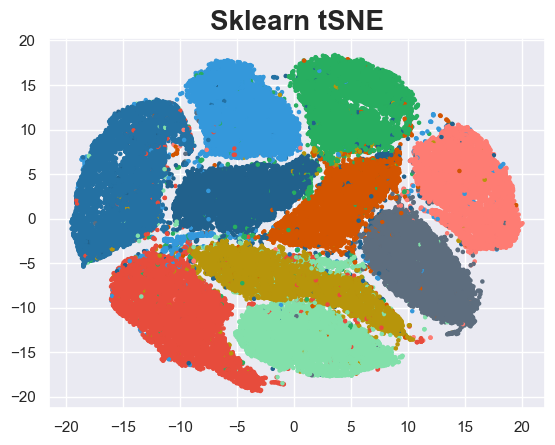

In [14]:
fig, ax = plt.subplots()

ax.scatter(embeddings_sklearn[:, 0], embeddings_sklearn[:, 1], c = [colors[i] for i in y], s=5)

ax.set_title("Sklearn tSNE", fontsize=20, weight="bold")

plt.show()